<a href="https://colab.research.google.com/github/ChethanKMurthy/Portfolio-Optimisation-/blob/main/TECH_Portfolio_Allocation_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader
import yfinance as yf
import datetime
import pandas_datareader.data as web

In [ ]:
start= datetime.datetime(2015,1,1)
end= datetime.datetime.today()


In [ ]:
CAP = yf.download('AAPL', start=start, end=end)
IBM = yf.download('IBM', start=start, end=end)
ACN = yf.download('ACN', start=start, end=end)
ORCL  = yf.download('ORCL', start=start, end=end)
SAP  = yf.download('SAP', start=start, end=end)
CTSH  = yf.download('CTSH', start=start, end=end)


CAP.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714720,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716955,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049519,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973555,237458000


In [ ]:
CAP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2388 entries, 2015-01-02 to 2024-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2388 non-null   float64
 1   High       2388 non-null   float64
 2   Low        2388 non-null   float64
 3   Close      2388 non-null   float64
 4   Adj Close  2388 non-null   float64
 5   Volume     2388 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 130.6 KB


In [ ]:
CAP = CAP[['Adj Close']]
IBM = IBM[['Adj Close']]
ACN = ACN[['Adj Close']]
ACN = ACN[['Adj Close']]
SAP = SAP[['Adj Close']]
CTSH = CTSH[['Adj Close']]

In [ ]:
CAP.head()

,Adj Close
Date,
2015-01-02,24.402172
2015-01-05,23.714720
2015-01-06,23.716955
2015-01-07,24.049519
2015-01-08,24.973555


In [ ]:
for stock_df in (CAP , IBM , ACN , SAP , CTSH):
    stock_df['Normed Return'] = stock_df['Adj Close']/ stock_df.iloc[0]['Adj Close']

<ipython-input-13-e6c30f11d362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Normed Return'] = stock_df['Adj Close']/ stock_df.iloc[0]['Adj Close']
<ipython-input-13-e6c30f11d362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Normed Return'] = stock_df['Adj Close']/ stock_df.iloc[0]['Adj Close']
<ipython-input-13-e6c30f11d362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

## Allocation:

In [ ]:
for stock_df in (CAP , IBM , ACN , SAP , CTSH ):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df['Adj Close'].iloc[0]
    allocations = [0.2, 0.2, 0.2,0.2,0.2]
for stock_df, allocation in zip((CAP , IBM , ACN , SAP , CTSH ), allocations):
    stock_df['Allocation'] = stock_df['Normed Return'] * allocation

<ipython-input-14-22fec2c50106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df['Adj Close'].iloc[0]
<ipython-input-14-22fec2c50106>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Allocation'] = stock_df['Normed Return'] * allocation
<ipython-input-14-22fec2c50106>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
for stock_df in (CAP , IBM , ACN , SAP , CTSH):
    stock_df['Position Amount']= stock_df['Allocation']*500000

<ipython-input-15-f5580ebfda1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Position Amount']= stock_df['Allocation']*500000
<ipython-input-15-f5580ebfda1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Position Amount']= stock_df['Allocation']*500000
<ipython-input-15-f5580ebfda1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

## Portfolio Value:

<Axes: xlabel='Date'>

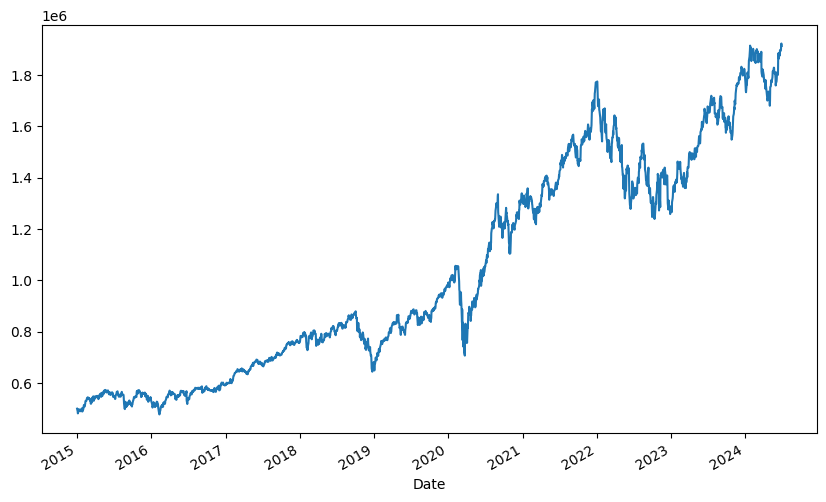

In [ ]:
total_pos_vals = [CAP['Position Amount'], IBM['Position Amount'], ACN['Position Amount'], SAP['Position Amount'], CTSH['Position Amount']]
portf_vals = pd.concat(total_pos_vals, axis=1)
portf_vals.columns = ['CAP POS', 'IBM POS', 'ACN POS', 'SAP POS', 'CTSH POS']
portf_vals['Total Pos'] = portf_vals.sum(axis=1)
portf_vals['Total Pos'].plot(figsize = (10,6))

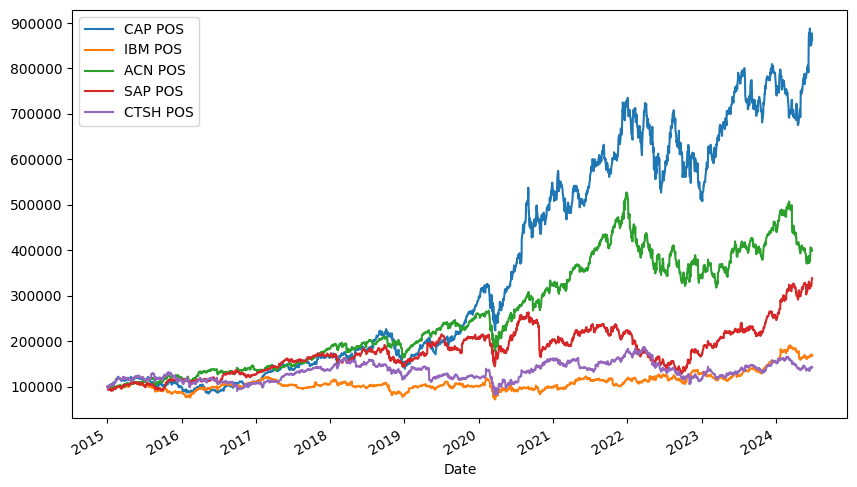

In [ ]:
portf_vals['2015/01/01':].drop('Total Pos', axis = 1).plot(figsize=(10,6));

## Portfolio Statistics

In [ ]:
portf_vals['Daily Return'] = portf_vals['Total Pos'].pct_change(1)
portf_vals.dropna(inplace = True)
print('Daily Return Average: ',portf_vals['Daily Return'].mean())
print('Daily Return Standard Deviation: ',portf_vals['Daily Return'].std())

Daily Return Average:  0.0006543229555912878
Daily Return Standard Deviation:  0.013556649174140132


To look at the distribution, let's take a look at a histogram and a KDE plot:

Expected Portfolio Return: 0.10183002491719069
Simulations complete


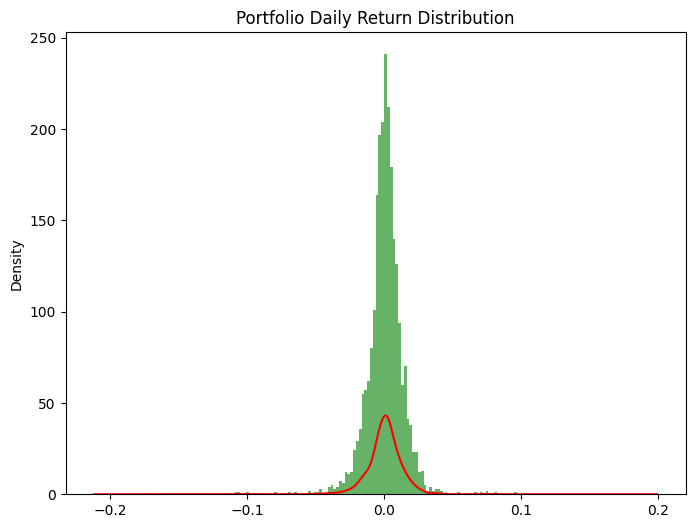

In [ ]:
log_returns = np.log(stocks / stocks.shift(1))

np.random.seed(101)
weights = np.random.random(5)
weights = weights / np.sum(weights)

exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return:', exp_ret)

num_ports = 5000
num_stocks = len(stocks.columns)
all_weights = np.zeros((num_ports, num_stocks))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.random.random(num_stocks)
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

print("Simulations complete")

allocations = stocks * weights

portfolio_df = pd.concat([allocations.iloc[:, 0], allocations.iloc[:, 1], allocations.iloc[:, 2], allocations.iloc[:, 3], allocations.iloc[:, 4]], axis=1)
portfolio_df.columns = ['CAP Allocation', 'IBM Allocation', 'ACN Allocation', 'SAP Allocation', 'CTSH Allocation']
portfolio_df['Total'] = portfolio_df.sum(axis=1)
portfolio_df['Daily Return'] = portfolio_df['Total'].pct_change()

portfolio_df['Daily Return'].plot(kind='hist', bins=100, figsize=(6, 8), color='green', alpha=0.6)
portfolio_df['Daily Return'].plot(kind='kde', figsize=(8, 6), color='r')

plt.title('Portfolio Daily Return Distribution')
plt.show()

In [ ]:
cumulative_return = 100*(portf_vals['Total Pos'][-1]/portf_vals['Total Pos'][0]-1)
print('Cumulative return: ', cumulative_return)

Cumulative return:  290.9426789079275


## Sharpe Ration

In [ ]:
SR = portf_vals['Daily Return'].mean()/portf_vals['Daily Return'].std()
print('Sharpe Ration = ', SR)

Sharpe Ration =  0.048265832300170154


In [ ]:
#Annual Sharpe Ratio:
ASR = (252**0.5) * SR
print('Annualized Sharpe Ratio = ', ASR)

Annualized Sharpe Ratio =  0.7661963345267931


Now let's allocate our securities in a most optimal way:

In [ ]:
stocks = pd.concat([CAP['Adj Close'], IBM['Adj Close'], ACN['Adj Close'], SAP['Adj Close'], CTSH['Adj Close']], axis=1)
stocks.columns = ['CAP', 'IBM', 'ACN', 'SAP', 'CTSH']
stocks.head()

,CAP,IBM,ACN,SAP,CTSH
Date,,,,,
2015-01-02,24.402172,102.338936,75.950920,59.525845,47.824680
2015-01-05,23.714720,100.728653,74.668533,57.112156,47.525040
2015-01-06,23.716955,98.556351,74.129944,55.820347,46.290146
2015-01-07,24.049519,97.912186,75.685875,55.318913,47.806511
2015-01-08,24.973555,100.040344,76.840034,56.202789,48.923367


To calculate Mean Daily Return:

In [ ]:
stocks.pct_change(1).mean()

CAP     0.001068
IBM     0.000334
ACN     0.000704
SAP     0.000655
CTSH    0.000309
dtype: float64

To calculate correlation between stocks:

In [ ]:
stocks.pct_change(1).corr()

,CAP,IBM,ACN,SAP,CTSH
CAP,1.000000,0.404570,0.562429,0.484362,0.483244
IBM,0.404570,1.000000,0.553718,0.441969,0.501814
ACN,0.562429,0.553718,1.000000,0.562330,0.652503
SAP,0.484362,0.441969,0.562330,1.000000,0.458525
CTSH,0.483244,0.501814,0.652503,0.458525,1.000000


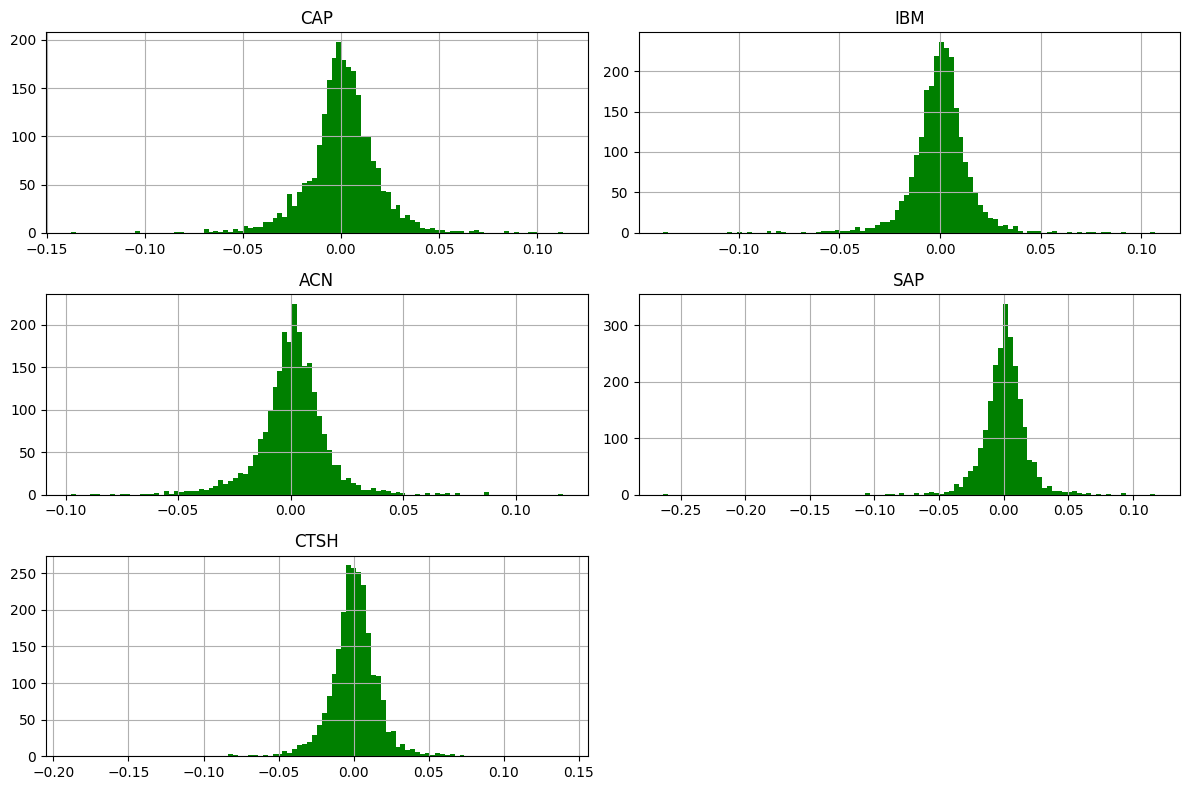

In [ ]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'g')
plt.tight_layout()

Covarience of the columns:

In [ ]:
log_returns.cov()*252

,CAP,IBM,ACN,SAP,CTSH
CAP,0.083090,0.028125,0.040496,0.037493,0.040062
IBM,0.028125,0.057698,0.033138,0.028633,0.034328
ACN,0.040496,0.033138,0.062074,0.037653,0.046592
SAP,0.037493,0.028633,0.037653,0.072809,0.035193
CTSH,0.040062,0.034328,0.046592,0.035193,0.082086


## Sharpe Ration for One Portfolio

Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]
Rebalance
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]


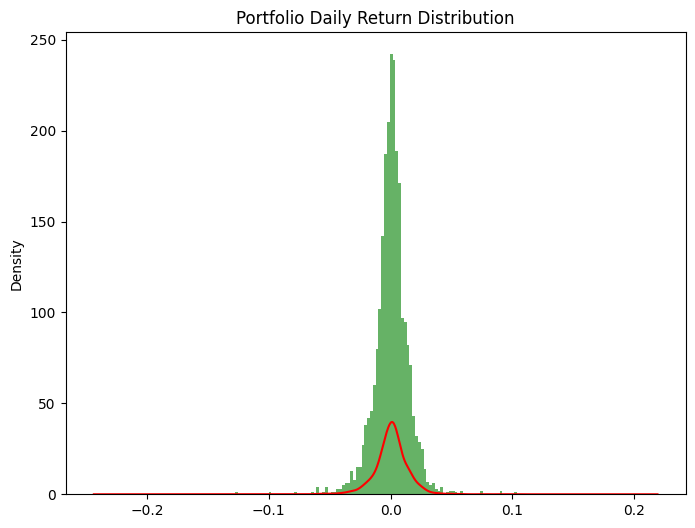

In [ ]:
stocks = pd.DataFrame({
    'CAP': CAP['Adj Close'],
    'IBM': IBM['Adj Close'],
    'ACN': ACN['Adj Close'],
    'SAP': SAP['Adj Close'],
    'CTSH': CTSH['Adj Close']
})

np.random.seed(101)
weights = np.random.random(5)

# Print out the random weights
print('Random Weights:')
print(weights)

# Rebalance the weights so that they add up to 1
print('Rebalance')
weights = weights / np.sum(weights)
print(weights)

# Normalize the returns so we can compare them on the same scale (start at 1)
normed_returns = stocks / stocks.iloc[0]

# Calculate the allocation for each stock based on our weights
allocation = normed_returns * weights

# Sum up the allocations to get the total portfolio value
portfolio_val = allocation.sum(axis=1)

# Calculate daily returns for the portfolio
portfolio_val = pd.DataFrame(portfolio_val, columns=['Total'])
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change()

# Plot the daily returns with a histogram and a kernel density estimate (KDE) plot
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(6, 8), color='green', alpha=0.6)
portfolio_val['Daily Return'].plot(kind='kde', figsize=(8, 6), color='r')

# Add a title to the plot and show it
plt.title('Portfolio Daily Return Distribution')
plt.show()

Expected Return:

In [ ]:
log_returns = np.log(stocks / stocks.shift(1))

# Set a seed for reproducibility and generate some random weights for our portfolio
np.random.seed(101)
weights = np.array(np.random.random(5))  # Change this to 5 to match the number of stocks

# Rebalance the weights so that they add up to 1
weights = weights / np.sum(weights)

# Calculate the expected portfolio return
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return:', exp_ret)

Expected Portfolio Return: 0.10183002491719069


Expected Volatility or Expected

In [ ]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)

Expected Volatility:  0.2141738506686491


The Sharpe Ratio:

In [ ]:
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  0.47545498481387033


# Choosing an optimal portfolio allocation.

In [ ]:
num_ports = 5000
num_stocks = len(stocks.columns)
all_weights = np.zeros((num_ports, num_stocks))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.random.random(num_stocks)
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

print("Simulations complete")


Simulations complete


In [ ]:
sharpe_arr.max()

0.7844025102693766

Index location for the best allocation:

In [ ]:
sharpe_arr.argmax()

2345

Here is the optimal allocation for our portfolio

In [ ]:
all_weights[sharpe_arr.argmax(),:]

array([0.4900944 , 0.02609947, 0.23858497, 0.2442924 , 0.00092876])

Let's plot the data:

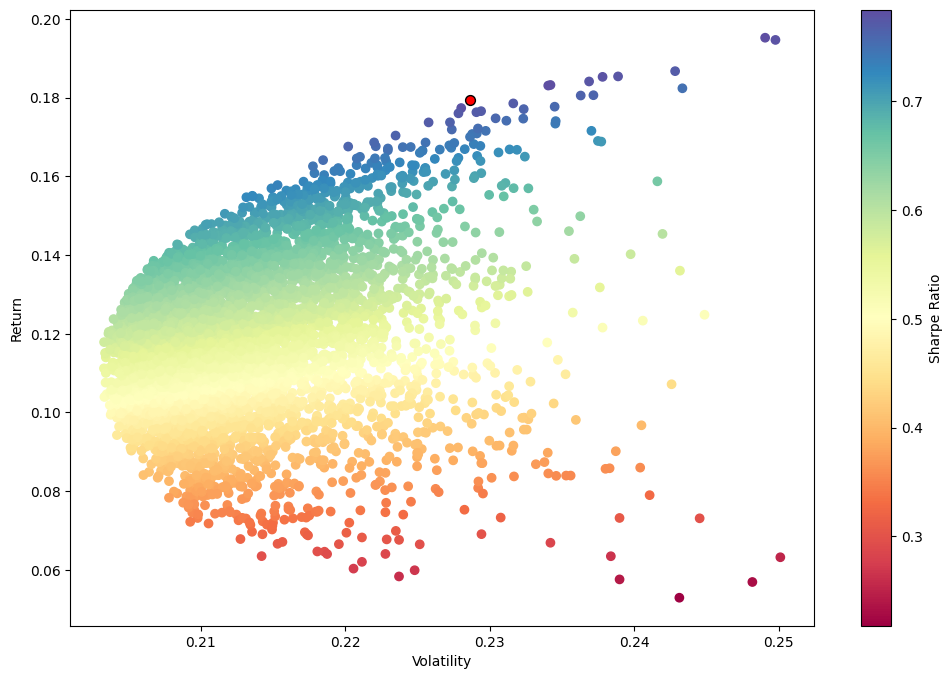

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='Spectral')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');